### Do required imports

In [75]:
from __future__ import print_function
import tweepy
import json
from pymongo import MongoClient

### Setup your mongo path

In [76]:
MONGO_HOST = 'mongodb://localhost/twitterdb'

### Prepare a search keywords

In [77]:
WORDS =['#bigdata','#AI','#datascience','#machinelearning','#ml','#iot']

### Set up Twitter API tokens and consumder keys

In [8]:
CONSUMER_KEY='vwCAn6JbypbkrVXOBMbMrqQvO'
CONSUMER_SECRET='oqltY6Xls78JhS37sss10ZW6oKBIyPIqyw9ZStzwhVWuhVl6gv'
ACCESS_KEY='1337046363838828545-Dh901imr730DwV9VDKq3XVxRnWYqHU'
ACCESS_SECRET='LSsztMDGPhoTeBOoS284i4kESzM4p2zsqOIx7tFopKjNG'

In [9]:
class StreamListener(tweepy.StreamListener):
    # This is the class provided by tweepy to access twitter Streaming API

    def on_connect(self):
        # called initially to connect to the streaming API
        print("you are connected to the streaming API")
    
    
    def on_error(self,status_code):
        # on error - if an error occurs displays the error / status code
        print("An Error has occured: " + repr(status_code))
        return False
    
    def on_data(self,data):
        # this part is main script where we connect to MongoDB and stores the tweet
        try:
            client = MongoClient(MONGO_HOST)
            
            # use twitterdb database. if it doesn't existed, it will be created
            db= client.twitterdb
            
            # Decode the JSON response from Twitter
            datajson = json.loads(data)
            
            # grab the Created_at data from the tweet to use for display
            created_at = datajson['created_at']
            
            # print out the message on every successful tweet we collected
            print("Tweet collected at " + str(created_at))
            
            # insert the data into the mongodb collection called twitter_search
            # it twitter_search is not existed, it will be created
            db.twitter_search.insert(datajson)
        
        except Exception as e:
            print(e)

        
        

In [13]:
 # authentification so we can access twitter
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
api =tweepy.API(auth, wait_on_rate_limit=True)

# create instance of Streamlistener
listener = StreamListener(api = api)
stream = tweepy.Stream(auth, listener = listener)

#track = ['golf', 'masters', 'reed', 'mcilroy', 'woods']
#track = ['nba', 'cavs', 'celtics', 'basketball']
# choose what we want to filter by
#print('Tracking: ' +str(WORDS))
stream.filter(track = WORDS)

you are connected to the streaming API
Tweet collected at Tue Mar 02 16:53:30 +0000 2021
Tweet collected at Tue Mar 02 16:53:30 +0000 2021


<ipython-input-9-f1e6c2071114>:33: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  db.twitter_search.insert(datajson)


Tweet collected at Tue Mar 02 16:53:31 +0000 2021
Tweet collected at Tue Mar 02 16:53:32 +0000 2021
Tweet collected at Tue Mar 02 16:53:32 +0000 2021
Tweet collected at Tue Mar 02 16:53:33 +0000 2021
Tweet collected at Tue Mar 02 16:53:33 +0000 2021
Tweet collected at Tue Mar 02 16:53:33 +0000 2021
Tweet collected at Tue Mar 02 16:53:33 +0000 2021
Tweet collected at Tue Mar 02 16:53:34 +0000 2021
Tweet collected at Tue Mar 02 16:53:39 +0000 2021
Tweet collected at Tue Mar 02 16:53:40 +0000 2021
Tweet collected at Tue Mar 02 16:53:41 +0000 2021
Tweet collected at Tue Mar 02 16:53:42 +0000 2021
Tweet collected at Tue Mar 02 16:53:42 +0000 2021
Tweet collected at Tue Mar 02 16:53:43 +0000 2021
Tweet collected at Tue Mar 02 16:53:43 +0000 2021
Tweet collected at Tue Mar 02 16:53:43 +0000 2021
Tweet collected at Tue Mar 02 16:53:45 +0000 2021
Tweet collected at Tue Mar 02 16:53:45 +0000 2021
Tweet collected at Tue Mar 02 16:53:45 +0000 2021
Tweet collected at Tue Mar 02 16:53:45 +0000 2021


Tweet collected at Tue Mar 02 16:55:57 +0000 2021
Tweet collected at Tue Mar 02 16:56:00 +0000 2021
Tweet collected at Tue Mar 02 16:56:00 +0000 2021
Tweet collected at Tue Mar 02 16:56:02 +0000 2021
Tweet collected at Tue Mar 02 16:56:03 +0000 2021
Tweet collected at Tue Mar 02 16:56:03 +0000 2021
Tweet collected at Tue Mar 02 16:56:04 +0000 2021
Tweet collected at Tue Mar 02 16:56:05 +0000 2021
Tweet collected at Tue Mar 02 16:56:06 +0000 2021
Tweet collected at Tue Mar 02 16:56:06 +0000 2021
Tweet collected at Tue Mar 02 16:56:08 +0000 2021
Tweet collected at Tue Mar 02 16:56:08 +0000 2021
Tweet collected at Tue Mar 02 16:56:09 +0000 2021
Tweet collected at Tue Mar 02 16:56:10 +0000 2021
Tweet collected at Tue Mar 02 16:56:11 +0000 2021
Tweet collected at Tue Mar 02 16:56:12 +0000 2021
Tweet collected at Tue Mar 02 16:56:13 +0000 2021
Tweet collected at Tue Mar 02 16:56:13 +0000 2021
Tweet collected at Tue Mar 02 16:56:13 +0000 2021
Tweet collected at Tue Mar 02 16:56:13 +0000 2021


Tweet collected at Tue Mar 02 16:58:28 +0000 2021
Tweet collected at Tue Mar 02 16:58:29 +0000 2021
Tweet collected at Tue Mar 02 16:58:30 +0000 2021
Tweet collected at Tue Mar 02 16:58:31 +0000 2021
Tweet collected at Tue Mar 02 16:58:31 +0000 2021
Tweet collected at Tue Mar 02 16:58:31 +0000 2021
Tweet collected at Tue Mar 02 16:58:32 +0000 2021
Tweet collected at Tue Mar 02 16:58:33 +0000 2021
Tweet collected at Tue Mar 02 16:58:33 +0000 2021
Tweet collected at Tue Mar 02 16:58:34 +0000 2021
Tweet collected at Tue Mar 02 16:58:35 +0000 2021
Tweet collected at Tue Mar 02 16:58:38 +0000 2021
Tweet collected at Tue Mar 02 16:58:38 +0000 2021
Tweet collected at Tue Mar 02 16:58:38 +0000 2021
Tweet collected at Tue Mar 02 16:58:39 +0000 2021
Tweet collected at Tue Mar 02 16:58:41 +0000 2021
Tweet collected at Tue Mar 02 16:58:42 +0000 2021
Tweet collected at Tue Mar 02 16:58:43 +0000 2021
Tweet collected at Tue Mar 02 16:58:44 +0000 2021
Tweet collected at Tue Mar 02 16:58:45 +0000 2021


Tweet collected at Tue Mar 02 17:00:18 +0000 2021
Tweet collected at Tue Mar 02 17:00:18 +0000 2021
Tweet collected at Tue Mar 02 17:00:18 +0000 2021
Tweet collected at Tue Mar 02 17:00:19 +0000 2021
Tweet collected at Tue Mar 02 17:00:20 +0000 2021
Tweet collected at Tue Mar 02 17:00:19 +0000 2021
Tweet collected at Tue Mar 02 17:00:19 +0000 2021
Tweet collected at Tue Mar 02 17:00:19 +0000 2021
Tweet collected at Tue Mar 02 17:00:20 +0000 2021
Tweet collected at Tue Mar 02 17:00:20 +0000 2021
Tweet collected at Tue Mar 02 17:00:21 +0000 2021
Tweet collected at Tue Mar 02 17:00:21 +0000 2021
Tweet collected at Tue Mar 02 17:00:21 +0000 2021
Tweet collected at Tue Mar 02 17:00:21 +0000 2021
Tweet collected at Tue Mar 02 17:00:22 +0000 2021
Tweet collected at Tue Mar 02 17:00:24 +0000 2021
Tweet collected at Tue Mar 02 17:00:24 +0000 2021
Tweet collected at Tue Mar 02 17:00:24 +0000 2021
Tweet collected at Tue Mar 02 17:00:24 +0000 2021
Tweet collected at Tue Mar 02 17:00:25 +0000 2021


Tweet collected at Tue Mar 02 17:01:57 +0000 2021
Tweet collected at Tue Mar 02 17:01:58 +0000 2021
Tweet collected at Tue Mar 02 17:02:01 +0000 2021
Tweet collected at Tue Mar 02 17:02:02 +0000 2021
Tweet collected at Tue Mar 02 17:02:02 +0000 2021
Tweet collected at Tue Mar 02 17:02:02 +0000 2021
Tweet collected at Tue Mar 02 17:02:03 +0000 2021
Tweet collected at Tue Mar 02 17:02:03 +0000 2021
Tweet collected at Tue Mar 02 17:02:04 +0000 2021
Tweet collected at Tue Mar 02 17:02:05 +0000 2021
Tweet collected at Tue Mar 02 17:02:06 +0000 2021
Tweet collected at Tue Mar 02 17:02:08 +0000 2021
Tweet collected at Tue Mar 02 17:02:11 +0000 2021
Tweet collected at Tue Mar 02 17:02:11 +0000 2021
Tweet collected at Tue Mar 02 17:02:13 +0000 2021
Tweet collected at Tue Mar 02 17:02:13 +0000 2021
Tweet collected at Tue Mar 02 17:02:15 +0000 2021
Tweet collected at Tue Mar 02 17:02:15 +0000 2021
Tweet collected at Tue Mar 02 17:02:17 +0000 2021
Tweet collected at Tue Mar 02 17:02:17 +0000 2021


Tweet collected at Tue Mar 02 17:04:18 +0000 2021
Tweet collected at Tue Mar 02 17:04:18 +0000 2021
Tweet collected at Tue Mar 02 17:04:24 +0000 2021
Tweet collected at Tue Mar 02 17:04:26 +0000 2021
Tweet collected at Tue Mar 02 17:04:30 +0000 2021
Tweet collected at Tue Mar 02 17:04:31 +0000 2021
Tweet collected at Tue Mar 02 17:04:31 +0000 2021
Tweet collected at Tue Mar 02 17:04:32 +0000 2021
Tweet collected at Tue Mar 02 17:04:33 +0000 2021
Tweet collected at Tue Mar 02 17:04:37 +0000 2021
Tweet collected at Tue Mar 02 17:04:37 +0000 2021
Tweet collected at Tue Mar 02 17:04:38 +0000 2021
Tweet collected at Tue Mar 02 17:04:38 +0000 2021
Tweet collected at Tue Mar 02 17:04:38 +0000 2021
Tweet collected at Tue Mar 02 17:04:38 +0000 2021
Tweet collected at Tue Mar 02 17:04:39 +0000 2021
Tweet collected at Tue Mar 02 17:04:39 +0000 2021
Tweet collected at Tue Mar 02 17:04:41 +0000 2021
Tweet collected at Tue Mar 02 17:04:41 +0000 2021
Tweet collected at Tue Mar 02 17:04:43 +0000 2021


Tweet collected at Tue Mar 02 17:06:48 +0000 2021
Tweet collected at Tue Mar 02 17:06:48 +0000 2021
Tweet collected at Tue Mar 02 17:06:51 +0000 2021
Tweet collected at Tue Mar 02 17:06:52 +0000 2021
Tweet collected at Tue Mar 02 17:06:53 +0000 2021
Tweet collected at Tue Mar 02 17:06:53 +0000 2021
Tweet collected at Tue Mar 02 17:06:55 +0000 2021
Tweet collected at Tue Mar 02 17:06:55 +0000 2021
Tweet collected at Tue Mar 02 17:06:56 +0000 2021
Tweet collected at Tue Mar 02 17:06:59 +0000 2021
Tweet collected at Tue Mar 02 17:07:00 +0000 2021
Tweet collected at Tue Mar 02 17:07:00 +0000 2021
Tweet collected at Tue Mar 02 17:07:00 +0000 2021
Tweet collected at Tue Mar 02 17:07:01 +0000 2021
Tweet collected at Tue Mar 02 17:07:02 +0000 2021
Tweet collected at Tue Mar 02 17:07:03 +0000 2021
Tweet collected at Tue Mar 02 17:07:03 +0000 2021
Tweet collected at Tue Mar 02 17:07:05 +0000 2021
Tweet collected at Tue Mar 02 17:07:05 +0000 2021
Tweet collected at Tue Mar 02 17:07:06 +0000 2021


Tweet collected at Tue Mar 02 17:08:59 +0000 2021
Tweet collected at Tue Mar 02 17:08:59 +0000 2021
Tweet collected at Tue Mar 02 17:09:00 +0000 2021
Tweet collected at Tue Mar 02 17:09:00 +0000 2021
Tweet collected at Tue Mar 02 17:09:02 +0000 2021
Tweet collected at Tue Mar 02 17:09:02 +0000 2021
Tweet collected at Tue Mar 02 17:09:03 +0000 2021
Tweet collected at Tue Mar 02 17:09:04 +0000 2021
Tweet collected at Tue Mar 02 17:09:04 +0000 2021
Tweet collected at Tue Mar 02 17:09:05 +0000 2021
Tweet collected at Tue Mar 02 17:09:06 +0000 2021
Tweet collected at Tue Mar 02 17:09:07 +0000 2021
Tweet collected at Tue Mar 02 17:09:08 +0000 2021
Tweet collected at Tue Mar 02 17:09:10 +0000 2021
Tweet collected at Tue Mar 02 17:09:12 +0000 2021
Tweet collected at Tue Mar 02 17:09:14 +0000 2021
Tweet collected at Tue Mar 02 17:09:16 +0000 2021
Tweet collected at Tue Mar 02 17:09:17 +0000 2021
Tweet collected at Tue Mar 02 17:09:17 +0000 2021
Tweet collected at Tue Mar 02 17:09:18 +0000 2021


Tweet collected at Tue Mar 02 17:11:12 +0000 2021
Tweet collected at Tue Mar 02 17:11:14 +0000 2021
Tweet collected at Tue Mar 02 17:11:15 +0000 2021
Tweet collected at Tue Mar 02 17:11:15 +0000 2021
Tweet collected at Tue Mar 02 17:11:16 +0000 2021
Tweet collected at Tue Mar 02 17:11:16 +0000 2021
Tweet collected at Tue Mar 02 17:11:17 +0000 2021
Tweet collected at Tue Mar 02 17:11:19 +0000 2021
Tweet collected at Tue Mar 02 17:11:20 +0000 2021
Tweet collected at Tue Mar 02 17:11:20 +0000 2021
Tweet collected at Tue Mar 02 17:11:22 +0000 2021
Tweet collected at Tue Mar 02 17:11:23 +0000 2021
Tweet collected at Tue Mar 02 17:11:24 +0000 2021
Tweet collected at Tue Mar 02 17:11:26 +0000 2021
Tweet collected at Tue Mar 02 17:11:27 +0000 2021
Tweet collected at Tue Mar 02 17:11:28 +0000 2021
Tweet collected at Tue Mar 02 17:11:28 +0000 2021
Tweet collected at Tue Mar 02 17:11:30 +0000 2021
Tweet collected at Tue Mar 02 17:11:30 +0000 2021
Tweet collected at Tue Mar 02 17:11:34 +0000 2021


Tweet collected at Tue Mar 02 17:14:32 +0000 2021
Tweet collected at Tue Mar 02 17:14:32 +0000 2021
Tweet collected at Tue Mar 02 17:14:36 +0000 2021
Tweet collected at Tue Mar 02 17:14:36 +0000 2021
Tweet collected at Tue Mar 02 17:14:36 +0000 2021
Tweet collected at Tue Mar 02 17:14:37 +0000 2021
Tweet collected at Tue Mar 02 17:14:37 +0000 2021
Tweet collected at Tue Mar 02 17:14:37 +0000 2021
Tweet collected at Tue Mar 02 17:14:38 +0000 2021
Tweet collected at Tue Mar 02 17:14:38 +0000 2021
Tweet collected at Tue Mar 02 17:14:40 +0000 2021
Tweet collected at Tue Mar 02 17:14:42 +0000 2021
Tweet collected at Tue Mar 02 17:14:43 +0000 2021
Tweet collected at Tue Mar 02 17:14:44 +0000 2021
Tweet collected at Tue Mar 02 17:14:45 +0000 2021
Tweet collected at Tue Mar 02 17:14:46 +0000 2021
Tweet collected at Tue Mar 02 17:14:47 +0000 2021
Tweet collected at Tue Mar 02 17:14:48 +0000 2021
Tweet collected at Tue Mar 02 17:14:48 +0000 2021
Tweet collected at Tue Mar 02 17:14:49 +0000 2021


Tweet collected at Tue Mar 02 17:17:02 +0000 2021
Tweet collected at Tue Mar 02 17:17:02 +0000 2021
Tweet collected at Tue Mar 02 17:17:03 +0000 2021
Tweet collected at Tue Mar 02 17:17:05 +0000 2021
Tweet collected at Tue Mar 02 17:17:07 +0000 2021
Tweet collected at Tue Mar 02 17:17:09 +0000 2021
Tweet collected at Tue Mar 02 17:17:10 +0000 2021
Tweet collected at Tue Mar 02 17:17:10 +0000 2021
Tweet collected at Tue Mar 02 17:17:11 +0000 2021
Tweet collected at Tue Mar 02 17:17:11 +0000 2021
Tweet collected at Tue Mar 02 17:17:12 +0000 2021
Tweet collected at Tue Mar 02 17:17:12 +0000 2021
Tweet collected at Tue Mar 02 17:17:13 +0000 2021
Tweet collected at Tue Mar 02 17:17:16 +0000 2021
Tweet collected at Tue Mar 02 17:17:17 +0000 2021
Tweet collected at Tue Mar 02 17:17:20 +0000 2021
Tweet collected at Tue Mar 02 17:17:21 +0000 2021
Tweet collected at Tue Mar 02 17:17:26 +0000 2021
Tweet collected at Tue Mar 02 17:17:28 +0000 2021
Tweet collected at Tue Mar 02 17:17:28 +0000 2021


Tweet collected at Tue Mar 02 17:20:14 +0000 2021
Tweet collected at Tue Mar 02 17:20:14 +0000 2021
Tweet collected at Tue Mar 02 17:20:14 +0000 2021
Tweet collected at Tue Mar 02 17:20:15 +0000 2021
Tweet collected at Tue Mar 02 17:20:15 +0000 2021
Tweet collected at Tue Mar 02 17:20:15 +0000 2021
Tweet collected at Tue Mar 02 17:20:15 +0000 2021
Tweet collected at Tue Mar 02 17:20:16 +0000 2021
Tweet collected at Tue Mar 02 17:20:16 +0000 2021
Tweet collected at Tue Mar 02 17:20:18 +0000 2021
Tweet collected at Tue Mar 02 17:20:19 +0000 2021
Tweet collected at Tue Mar 02 17:20:21 +0000 2021
Tweet collected at Tue Mar 02 17:20:21 +0000 2021
Tweet collected at Tue Mar 02 17:20:22 +0000 2021
Tweet collected at Tue Mar 02 17:20:22 +0000 2021
Tweet collected at Tue Mar 02 17:20:24 +0000 2021
Tweet collected at Tue Mar 02 17:20:24 +0000 2021
Tweet collected at Tue Mar 02 17:20:27 +0000 2021
Tweet collected at Tue Mar 02 17:20:28 +0000 2021
Tweet collected at Tue Mar 02 17:20:29 +0000 2021


Tweet collected at Tue Mar 02 17:23:22 +0000 2021
Tweet collected at Tue Mar 02 17:23:23 +0000 2021
Tweet collected at Tue Mar 02 17:23:29 +0000 2021
Tweet collected at Tue Mar 02 17:23:30 +0000 2021
Tweet collected at Tue Mar 02 17:23:31 +0000 2021
Tweet collected at Tue Mar 02 17:23:31 +0000 2021
Tweet collected at Tue Mar 02 17:23:33 +0000 2021
Tweet collected at Tue Mar 02 17:23:34 +0000 2021
Tweet collected at Tue Mar 02 17:23:34 +0000 2021
Tweet collected at Tue Mar 02 17:23:35 +0000 2021
Tweet collected at Tue Mar 02 17:23:36 +0000 2021
Tweet collected at Tue Mar 02 17:23:37 +0000 2021
Tweet collected at Tue Mar 02 17:23:37 +0000 2021
Tweet collected at Tue Mar 02 17:23:43 +0000 2021
Tweet collected at Tue Mar 02 17:23:44 +0000 2021
Tweet collected at Tue Mar 02 17:23:48 +0000 2021
Tweet collected at Tue Mar 02 17:23:49 +0000 2021
Tweet collected at Tue Mar 02 17:23:49 +0000 2021
Tweet collected at Tue Mar 02 17:23:50 +0000 2021
Tweet collected at Tue Mar 02 17:23:53 +0000 2021


Tweet collected at Tue Mar 02 17:26:20 +0000 2021
Tweet collected at Tue Mar 02 17:26:20 +0000 2021
Tweet collected at Tue Mar 02 17:26:20 +0000 2021
Tweet collected at Tue Mar 02 17:26:23 +0000 2021
Tweet collected at Tue Mar 02 17:26:26 +0000 2021
Tweet collected at Tue Mar 02 17:26:28 +0000 2021
Tweet collected at Tue Mar 02 17:26:28 +0000 2021
Tweet collected at Tue Mar 02 17:26:29 +0000 2021
Tweet collected at Tue Mar 02 17:26:30 +0000 2021
Tweet collected at Tue Mar 02 17:26:31 +0000 2021
Tweet collected at Tue Mar 02 17:26:32 +0000 2021
Tweet collected at Tue Mar 02 17:26:33 +0000 2021
Tweet collected at Tue Mar 02 17:26:35 +0000 2021
Tweet collected at Tue Mar 02 17:26:35 +0000 2021
Tweet collected at Tue Mar 02 17:26:37 +0000 2021
Tweet collected at Tue Mar 02 17:26:37 +0000 2021
Tweet collected at Tue Mar 02 17:26:37 +0000 2021
Tweet collected at Tue Mar 02 17:26:38 +0000 2021
Tweet collected at Tue Mar 02 17:26:39 +0000 2021
Tweet collected at Tue Mar 02 17:26:39 +0000 2021


Tweet collected at Tue Mar 02 17:29:12 +0000 2021
Tweet collected at Tue Mar 02 17:29:12 +0000 2021
Tweet collected at Tue Mar 02 17:29:12 +0000 2021
Tweet collected at Tue Mar 02 17:29:16 +0000 2021
Tweet collected at Tue Mar 02 17:29:18 +0000 2021
Tweet collected at Tue Mar 02 17:29:19 +0000 2021
Tweet collected at Tue Mar 02 17:29:19 +0000 2021
Tweet collected at Tue Mar 02 17:29:21 +0000 2021
Tweet collected at Tue Mar 02 17:29:23 +0000 2021
Tweet collected at Tue Mar 02 17:29:24 +0000 2021
Tweet collected at Tue Mar 02 17:29:24 +0000 2021
Tweet collected at Tue Mar 02 17:29:26 +0000 2021
Tweet collected at Tue Mar 02 17:29:27 +0000 2021
Tweet collected at Tue Mar 02 17:29:28 +0000 2021
Tweet collected at Tue Mar 02 17:29:28 +0000 2021
Tweet collected at Tue Mar 02 17:29:28 +0000 2021
Tweet collected at Tue Mar 02 17:29:30 +0000 2021
Tweet collected at Tue Mar 02 17:29:34 +0000 2021
Tweet collected at Tue Mar 02 17:29:38 +0000 2021
Tweet collected at Tue Mar 02 17:29:38 +0000 2021


Tweet collected at Tue Mar 02 17:31:51 +0000 2021
Tweet collected at Tue Mar 02 17:31:51 +0000 2021
Tweet collected at Tue Mar 02 17:31:52 +0000 2021
Tweet collected at Tue Mar 02 17:31:52 +0000 2021
Tweet collected at Tue Mar 02 17:31:54 +0000 2021
Tweet collected at Tue Mar 02 17:31:56 +0000 2021
Tweet collected at Tue Mar 02 17:31:57 +0000 2021
Tweet collected at Tue Mar 02 17:31:57 +0000 2021
Tweet collected at Tue Mar 02 17:31:58 +0000 2021
Tweet collected at Tue Mar 02 17:31:58 +0000 2021
Tweet collected at Tue Mar 02 17:31:59 +0000 2021
Tweet collected at Tue Mar 02 17:31:59 +0000 2021
Tweet collected at Tue Mar 02 17:32:00 +0000 2021
Tweet collected at Tue Mar 02 17:32:01 +0000 2021
Tweet collected at Tue Mar 02 17:32:01 +0000 2021
Tweet collected at Tue Mar 02 17:32:01 +0000 2021
Tweet collected at Tue Mar 02 17:32:02 +0000 2021
Tweet collected at Tue Mar 02 17:32:02 +0000 2021
Tweet collected at Tue Mar 02 17:32:02 +0000 2021
Tweet collected at Tue Mar 02 17:32:02 +0000 2021


Tweet collected at Tue Mar 02 17:34:28 +0000 2021
Tweet collected at Tue Mar 02 17:34:29 +0000 2021
Tweet collected at Tue Mar 02 17:34:29 +0000 2021
Tweet collected at Tue Mar 02 17:34:30 +0000 2021
Tweet collected at Tue Mar 02 17:34:31 +0000 2021
Tweet collected at Tue Mar 02 17:34:32 +0000 2021
Tweet collected at Tue Mar 02 17:34:33 +0000 2021
Tweet collected at Tue Mar 02 17:34:35 +0000 2021
Tweet collected at Tue Mar 02 17:34:36 +0000 2021
Tweet collected at Tue Mar 02 17:34:40 +0000 2021
Tweet collected at Tue Mar 02 17:34:40 +0000 2021
Tweet collected at Tue Mar 02 17:34:41 +0000 2021
Tweet collected at Tue Mar 02 17:34:42 +0000 2021
Tweet collected at Tue Mar 02 17:34:43 +0000 2021
Tweet collected at Tue Mar 02 17:34:45 +0000 2021
Tweet collected at Tue Mar 02 17:34:46 +0000 2021
Tweet collected at Tue Mar 02 17:34:46 +0000 2021
Tweet collected at Tue Mar 02 17:34:47 +0000 2021
Tweet collected at Tue Mar 02 17:34:48 +0000 2021
Tweet collected at Tue Mar 02 17:34:48 +0000 2021


Tweet collected at Tue Mar 02 17:36:54 +0000 2021
Tweet collected at Tue Mar 02 17:36:54 +0000 2021
Tweet collected at Tue Mar 02 17:36:58 +0000 2021
Tweet collected at Tue Mar 02 17:36:59 +0000 2021
Tweet collected at Tue Mar 02 17:37:01 +0000 2021
Tweet collected at Tue Mar 02 17:37:02 +0000 2021
Tweet collected at Tue Mar 02 17:37:05 +0000 2021
Tweet collected at Tue Mar 02 17:37:07 +0000 2021
Tweet collected at Tue Mar 02 17:37:09 +0000 2021
Tweet collected at Tue Mar 02 17:37:10 +0000 2021
Tweet collected at Tue Mar 02 17:37:10 +0000 2021
Tweet collected at Tue Mar 02 17:37:10 +0000 2021
Tweet collected at Tue Mar 02 17:37:11 +0000 2021
Tweet collected at Tue Mar 02 17:37:11 +0000 2021
Tweet collected at Tue Mar 02 17:37:12 +0000 2021
Tweet collected at Tue Mar 02 17:37:12 +0000 2021
Tweet collected at Tue Mar 02 17:37:13 +0000 2021
Tweet collected at Tue Mar 02 17:37:13 +0000 2021
Tweet collected at Tue Mar 02 17:37:14 +0000 2021
Tweet collected at Tue Mar 02 17:37:15 +0000 2021


Tweet collected at Tue Mar 02 17:39:52 +0000 2021
Tweet collected at Tue Mar 02 17:39:58 +0000 2021
Tweet collected at Tue Mar 02 17:39:58 +0000 2021
Tweet collected at Tue Mar 02 17:39:59 +0000 2021
Tweet collected at Tue Mar 02 17:40:00 +0000 2021
Tweet collected at Tue Mar 02 17:40:01 +0000 2021
Tweet collected at Tue Mar 02 17:40:03 +0000 2021
Tweet collected at Tue Mar 02 17:40:03 +0000 2021
Tweet collected at Tue Mar 02 17:40:03 +0000 2021
Tweet collected at Tue Mar 02 17:40:04 +0000 2021
Tweet collected at Tue Mar 02 17:40:04 +0000 2021
Tweet collected at Tue Mar 02 17:40:05 +0000 2021
Tweet collected at Tue Mar 02 17:40:05 +0000 2021
Tweet collected at Tue Mar 02 17:40:05 +0000 2021
Tweet collected at Tue Mar 02 17:40:05 +0000 2021
Tweet collected at Tue Mar 02 17:40:05 +0000 2021
Tweet collected at Tue Mar 02 17:40:05 +0000 2021
Tweet collected at Tue Mar 02 17:40:05 +0000 2021
Tweet collected at Tue Mar 02 17:40:05 +0000 2021
Tweet collected at Tue Mar 02 17:40:05 +0000 2021


Tweet collected at Tue Mar 02 17:42:07 +0000 2021
Tweet collected at Tue Mar 02 17:42:09 +0000 2021
Tweet collected at Tue Mar 02 17:42:09 +0000 2021
Tweet collected at Tue Mar 02 17:42:09 +0000 2021
Tweet collected at Tue Mar 02 17:42:11 +0000 2021
Tweet collected at Tue Mar 02 17:42:11 +0000 2021
Tweet collected at Tue Mar 02 17:42:13 +0000 2021
Tweet collected at Tue Mar 02 17:42:15 +0000 2021
Tweet collected at Tue Mar 02 17:42:16 +0000 2021
Tweet collected at Tue Mar 02 17:42:16 +0000 2021
Tweet collected at Tue Mar 02 17:42:16 +0000 2021
Tweet collected at Tue Mar 02 17:42:17 +0000 2021
Tweet collected at Tue Mar 02 17:42:18 +0000 2021
Tweet collected at Tue Mar 02 17:42:19 +0000 2021
Tweet collected at Tue Mar 02 17:42:19 +0000 2021
Tweet collected at Tue Mar 02 17:42:21 +0000 2021
Tweet collected at Tue Mar 02 17:42:21 +0000 2021
Tweet collected at Tue Mar 02 17:42:21 +0000 2021
Tweet collected at Tue Mar 02 17:42:25 +0000 2021
Tweet collected at Tue Mar 02 17:42:28 +0000 2021


Tweet collected at Tue Mar 02 17:44:45 +0000 2021
Tweet collected at Tue Mar 02 17:44:45 +0000 2021
Tweet collected at Tue Mar 02 17:44:46 +0000 2021
Tweet collected at Tue Mar 02 17:44:47 +0000 2021
Tweet collected at Tue Mar 02 17:44:47 +0000 2021
Tweet collected at Tue Mar 02 17:44:47 +0000 2021
Tweet collected at Tue Mar 02 17:44:49 +0000 2021
Tweet collected at Tue Mar 02 17:44:49 +0000 2021
Tweet collected at Tue Mar 02 17:44:50 +0000 2021
Tweet collected at Tue Mar 02 17:44:52 +0000 2021
Tweet collected at Tue Mar 02 17:44:52 +0000 2021
Tweet collected at Tue Mar 02 17:44:52 +0000 2021
Tweet collected at Tue Mar 02 17:44:53 +0000 2021
Tweet collected at Tue Mar 02 17:44:53 +0000 2021
Tweet collected at Tue Mar 02 17:44:55 +0000 2021
Tweet collected at Tue Mar 02 17:44:58 +0000 2021
Tweet collected at Tue Mar 02 17:44:59 +0000 2021
Tweet collected at Tue Mar 02 17:44:59 +0000 2021
Tweet collected at Tue Mar 02 17:45:00 +0000 2021
Tweet collected at Tue Mar 02 17:45:00 +0000 2021


Tweet collected at Tue Mar 02 17:47:12 +0000 2021
Tweet collected at Tue Mar 02 17:47:13 +0000 2021
Tweet collected at Tue Mar 02 17:47:14 +0000 2021
Tweet collected at Tue Mar 02 17:47:15 +0000 2021
Tweet collected at Tue Mar 02 17:47:18 +0000 2021
Tweet collected at Tue Mar 02 17:47:18 +0000 2021
Tweet collected at Tue Mar 02 17:47:18 +0000 2021
Tweet collected at Tue Mar 02 17:47:19 +0000 2021
Tweet collected at Tue Mar 02 17:47:20 +0000 2021
Tweet collected at Tue Mar 02 17:47:21 +0000 2021
Tweet collected at Tue Mar 02 17:47:21 +0000 2021
Tweet collected at Tue Mar 02 17:47:23 +0000 2021
Tweet collected at Tue Mar 02 17:47:24 +0000 2021
Tweet collected at Tue Mar 02 17:47:26 +0000 2021
Tweet collected at Tue Mar 02 17:47:26 +0000 2021
Tweet collected at Tue Mar 02 17:47:27 +0000 2021
Tweet collected at Tue Mar 02 17:47:27 +0000 2021
Tweet collected at Tue Mar 02 17:47:28 +0000 2021
Tweet collected at Tue Mar 02 17:47:28 +0000 2021
Tweet collected at Tue Mar 02 17:47:28 +0000 2021


Tweet collected at Tue Mar 02 17:49:51 +0000 2021
Tweet collected at Tue Mar 02 17:49:52 +0000 2021
Tweet collected at Tue Mar 02 17:49:52 +0000 2021
Tweet collected at Tue Mar 02 17:49:53 +0000 2021
Tweet collected at Tue Mar 02 17:49:53 +0000 2021
Tweet collected at Tue Mar 02 17:49:54 +0000 2021
Tweet collected at Tue Mar 02 17:49:55 +0000 2021
Tweet collected at Tue Mar 02 17:49:57 +0000 2021
Tweet collected at Tue Mar 02 17:49:57 +0000 2021
Tweet collected at Tue Mar 02 17:49:58 +0000 2021
Tweet collected at Tue Mar 02 17:49:59 +0000 2021
Tweet collected at Tue Mar 02 17:49:59 +0000 2021
Tweet collected at Tue Mar 02 17:50:01 +0000 2021
Tweet collected at Tue Mar 02 17:50:01 +0000 2021
Tweet collected at Tue Mar 02 17:50:02 +0000 2021
Tweet collected at Tue Mar 02 17:50:02 +0000 2021
Tweet collected at Tue Mar 02 17:50:02 +0000 2021
Tweet collected at Tue Mar 02 17:50:04 +0000 2021
Tweet collected at Tue Mar 02 17:50:04 +0000 2021
Tweet collected at Tue Mar 02 17:50:04 +0000 2021


Tweet collected at Tue Mar 02 17:52:01 +0000 2021
Tweet collected at Tue Mar 02 17:52:02 +0000 2021
Tweet collected at Tue Mar 02 17:52:03 +0000 2021
Tweet collected at Tue Mar 02 17:52:04 +0000 2021
Tweet collected at Tue Mar 02 17:52:04 +0000 2021
Tweet collected at Tue Mar 02 17:52:06 +0000 2021
Tweet collected at Tue Mar 02 17:52:09 +0000 2021
Tweet collected at Tue Mar 02 17:52:09 +0000 2021
Tweet collected at Tue Mar 02 17:52:10 +0000 2021
Tweet collected at Tue Mar 02 17:52:11 +0000 2021
Tweet collected at Tue Mar 02 17:52:12 +0000 2021
Tweet collected at Tue Mar 02 17:52:13 +0000 2021
Tweet collected at Tue Mar 02 17:52:13 +0000 2021
Tweet collected at Tue Mar 02 17:52:16 +0000 2021
Tweet collected at Tue Mar 02 17:52:16 +0000 2021
Tweet collected at Tue Mar 02 17:52:18 +0000 2021
Tweet collected at Tue Mar 02 17:52:18 +0000 2021
Tweet collected at Tue Mar 02 17:52:19 +0000 2021
Tweet collected at Tue Mar 02 17:52:19 +0000 2021
Tweet collected at Tue Mar 02 17:52:20 +0000 2021


Tweet collected at Tue Mar 02 17:55:11 +0000 2021
Tweet collected at Tue Mar 02 17:55:12 +0000 2021
Tweet collected at Tue Mar 02 17:55:15 +0000 2021
Tweet collected at Tue Mar 02 17:55:16 +0000 2021
Tweet collected at Tue Mar 02 17:55:19 +0000 2021
Tweet collected at Tue Mar 02 17:55:20 +0000 2021
Tweet collected at Tue Mar 02 17:55:20 +0000 2021
Tweet collected at Tue Mar 02 17:55:21 +0000 2021
Tweet collected at Tue Mar 02 17:55:23 +0000 2021
Tweet collected at Tue Mar 02 17:55:24 +0000 2021
Tweet collected at Tue Mar 02 17:55:26 +0000 2021
Tweet collected at Tue Mar 02 17:55:27 +0000 2021
Tweet collected at Tue Mar 02 17:55:27 +0000 2021
Tweet collected at Tue Mar 02 17:55:28 +0000 2021
Tweet collected at Tue Mar 02 17:55:28 +0000 2021
Tweet collected at Tue Mar 02 17:55:29 +0000 2021
Tweet collected at Tue Mar 02 17:55:30 +0000 2021
Tweet collected at Tue Mar 02 17:55:30 +0000 2021
Tweet collected at Tue Mar 02 17:55:32 +0000 2021
Tweet collected at Tue Mar 02 17:55:33 +0000 2021


Tweet collected at Tue Mar 02 17:58:54 +0000 2021
Tweet collected at Tue Mar 02 17:58:54 +0000 2021
Tweet collected at Tue Mar 02 17:58:55 +0000 2021
Tweet collected at Tue Mar 02 17:58:55 +0000 2021
Tweet collected at Tue Mar 02 17:58:55 +0000 2021
Tweet collected at Tue Mar 02 17:58:55 +0000 2021
Tweet collected at Tue Mar 02 17:58:56 +0000 2021
Tweet collected at Tue Mar 02 17:58:57 +0000 2021
Tweet collected at Tue Mar 02 17:58:57 +0000 2021
Tweet collected at Tue Mar 02 17:58:58 +0000 2021
Tweet collected at Tue Mar 02 17:59:00 +0000 2021
Tweet collected at Tue Mar 02 17:59:01 +0000 2021
Tweet collected at Tue Mar 02 17:59:01 +0000 2021
Tweet collected at Tue Mar 02 17:59:03 +0000 2021
Tweet collected at Tue Mar 02 17:59:08 +0000 2021
Tweet collected at Tue Mar 02 17:59:13 +0000 2021
Tweet collected at Tue Mar 02 17:59:17 +0000 2021
Tweet collected at Tue Mar 02 17:59:19 +0000 2021
Tweet collected at Tue Mar 02 17:59:20 +0000 2021
Tweet collected at Tue Mar 02 17:59:21 +0000 2021


Tweet collected at Tue Mar 02 18:00:33 +0000 2021
Tweet collected at Tue Mar 02 18:00:36 +0000 2021
Tweet collected at Tue Mar 02 18:00:36 +0000 2021
Tweet collected at Tue Mar 02 18:00:36 +0000 2021
Tweet collected at Tue Mar 02 18:00:37 +0000 2021
Tweet collected at Tue Mar 02 18:00:38 +0000 2021
Tweet collected at Tue Mar 02 18:00:40 +0000 2021
Tweet collected at Tue Mar 02 18:00:41 +0000 2021
Tweet collected at Tue Mar 02 18:00:41 +0000 2021
Tweet collected at Tue Mar 02 18:00:41 +0000 2021
Tweet collected at Tue Mar 02 18:00:41 +0000 2021
Tweet collected at Tue Mar 02 18:00:42 +0000 2021
Tweet collected at Tue Mar 02 18:00:42 +0000 2021
Tweet collected at Tue Mar 02 18:00:43 +0000 2021
Tweet collected at Tue Mar 02 18:00:43 +0000 2021
Tweet collected at Tue Mar 02 18:00:44 +0000 2021
Tweet collected at Tue Mar 02 18:00:46 +0000 2021
Tweet collected at Tue Mar 02 18:00:47 +0000 2021
Tweet collected at Tue Mar 02 18:00:49 +0000 2021
Tweet collected at Tue Mar 02 18:00:49 +0000 2021


Tweet collected at Tue Mar 02 18:03:19 +0000 2021
Tweet collected at Tue Mar 02 18:03:21 +0000 2021
Tweet collected at Tue Mar 02 18:03:24 +0000 2021
Tweet collected at Tue Mar 02 18:03:24 +0000 2021
Tweet collected at Tue Mar 02 18:03:24 +0000 2021
Tweet collected at Tue Mar 02 18:03:24 +0000 2021
Tweet collected at Tue Mar 02 18:03:26 +0000 2021
Tweet collected at Tue Mar 02 18:03:29 +0000 2021
Tweet collected at Tue Mar 02 18:03:31 +0000 2021
Tweet collected at Tue Mar 02 18:03:31 +0000 2021
Tweet collected at Tue Mar 02 18:03:34 +0000 2021
Tweet collected at Tue Mar 02 18:03:35 +0000 2021
Tweet collected at Tue Mar 02 18:03:36 +0000 2021
Tweet collected at Tue Mar 02 18:03:36 +0000 2021
Tweet collected at Tue Mar 02 18:03:38 +0000 2021
Tweet collected at Tue Mar 02 18:03:42 +0000 2021
Tweet collected at Tue Mar 02 18:03:43 +0000 2021
Tweet collected at Tue Mar 02 18:03:45 +0000 2021
Tweet collected at Tue Mar 02 18:03:45 +0000 2021
Tweet collected at Tue Mar 02 18:03:45 +0000 2021


Tweet collected at Tue Mar 02 18:06:22 +0000 2021
Tweet collected at Tue Mar 02 18:06:23 +0000 2021
Tweet collected at Tue Mar 02 18:06:23 +0000 2021
Tweet collected at Tue Mar 02 18:06:24 +0000 2021
Tweet collected at Tue Mar 02 18:06:25 +0000 2021
Tweet collected at Tue Mar 02 18:06:25 +0000 2021
Tweet collected at Tue Mar 02 18:06:26 +0000 2021
Tweet collected at Tue Mar 02 18:06:27 +0000 2021
Tweet collected at Tue Mar 02 18:06:28 +0000 2021
Tweet collected at Tue Mar 02 18:06:28 +0000 2021
Tweet collected at Tue Mar 02 18:06:29 +0000 2021
Tweet collected at Tue Mar 02 18:06:29 +0000 2021
Tweet collected at Tue Mar 02 18:06:30 +0000 2021
Tweet collected at Tue Mar 02 18:06:31 +0000 2021
Tweet collected at Tue Mar 02 18:06:32 +0000 2021
Tweet collected at Tue Mar 02 18:06:32 +0000 2021
Tweet collected at Tue Mar 02 18:06:33 +0000 2021
Tweet collected at Tue Mar 02 18:06:34 +0000 2021
Tweet collected at Tue Mar 02 18:06:34 +0000 2021
Tweet collected at Tue Mar 02 18:06:36 +0000 2021


Tweet collected at Tue Mar 02 18:09:11 +0000 2021
Tweet collected at Tue Mar 02 18:09:12 +0000 2021
Tweet collected at Tue Mar 02 18:09:14 +0000 2021
Tweet collected at Tue Mar 02 18:09:14 +0000 2021
Tweet collected at Tue Mar 02 18:09:16 +0000 2021
Tweet collected at Tue Mar 02 18:09:16 +0000 2021
Tweet collected at Tue Mar 02 18:09:17 +0000 2021
Tweet collected at Tue Mar 02 18:09:18 +0000 2021
Tweet collected at Tue Mar 02 18:09:18 +0000 2021
Tweet collected at Tue Mar 02 18:09:18 +0000 2021
Tweet collected at Tue Mar 02 18:09:19 +0000 2021
Tweet collected at Tue Mar 02 18:09:21 +0000 2021
Tweet collected at Tue Mar 02 18:09:21 +0000 2021
Tweet collected at Tue Mar 02 18:09:21 +0000 2021
Tweet collected at Tue Mar 02 18:09:22 +0000 2021
Tweet collected at Tue Mar 02 18:09:23 +0000 2021
Tweet collected at Tue Mar 02 18:09:25 +0000 2021
Tweet collected at Tue Mar 02 18:09:26 +0000 2021
Tweet collected at Tue Mar 02 18:09:27 +0000 2021
Tweet collected at Tue Mar 02 18:09:27 +0000 2021


Tweet collected at Tue Mar 02 18:10:23 +0000 2021
Tweet collected at Tue Mar 02 18:10:23 +0000 2021
Tweet collected at Tue Mar 02 18:10:24 +0000 2021
Tweet collected at Tue Mar 02 18:10:24 +0000 2021
Tweet collected at Tue Mar 02 18:10:24 +0000 2021
Tweet collected at Tue Mar 02 18:10:25 +0000 2021
Tweet collected at Tue Mar 02 18:10:26 +0000 2021
Tweet collected at Tue Mar 02 18:10:26 +0000 2021
Tweet collected at Tue Mar 02 18:10:26 +0000 2021
Tweet collected at Tue Mar 02 18:10:27 +0000 2021
Tweet collected at Tue Mar 02 18:10:28 +0000 2021
Tweet collected at Tue Mar 02 18:10:28 +0000 2021
Tweet collected at Tue Mar 02 18:10:29 +0000 2021
Tweet collected at Tue Mar 02 18:10:29 +0000 2021
Tweet collected at Tue Mar 02 18:10:30 +0000 2021
Tweet collected at Tue Mar 02 18:10:31 +0000 2021
Tweet collected at Tue Mar 02 18:10:31 +0000 2021
Tweet collected at Tue Mar 02 18:10:31 +0000 2021
Tweet collected at Tue Mar 02 18:10:32 +0000 2021
Tweet collected at Tue Mar 02 18:10:32 +0000 2021


Tweet collected at Tue Mar 02 18:11:34 +0000 2021
Tweet collected at Tue Mar 02 18:11:38 +0000 2021
Tweet collected at Tue Mar 02 18:11:40 +0000 2021
Tweet collected at Tue Mar 02 18:11:40 +0000 2021
Tweet collected at Tue Mar 02 18:11:41 +0000 2021
Tweet collected at Tue Mar 02 18:11:42 +0000 2021
Tweet collected at Tue Mar 02 18:11:47 +0000 2021
Tweet collected at Tue Mar 02 18:11:47 +0000 2021
Tweet collected at Tue Mar 02 18:11:48 +0000 2021
Tweet collected at Tue Mar 02 18:11:49 +0000 2021
Tweet collected at Tue Mar 02 18:11:50 +0000 2021
Tweet collected at Tue Mar 02 18:11:52 +0000 2021
Tweet collected at Tue Mar 02 18:11:55 +0000 2021
Tweet collected at Tue Mar 02 18:11:55 +0000 2021
Tweet collected at Tue Mar 02 18:11:56 +0000 2021
Tweet collected at Tue Mar 02 18:11:58 +0000 2021
Tweet collected at Tue Mar 02 18:12:00 +0000 2021
Tweet collected at Tue Mar 02 18:12:01 +0000 2021
Tweet collected at Tue Mar 02 18:12:01 +0000 2021
Tweet collected at Tue Mar 02 18:12:02 +0000 2021


Tweet collected at Tue Mar 02 18:15:00 +0000 2021
Tweet collected at Tue Mar 02 18:15:00 +0000 2021
Tweet collected at Tue Mar 02 18:15:02 +0000 2021
Tweet collected at Tue Mar 02 18:15:04 +0000 2021
Tweet collected at Tue Mar 02 18:15:04 +0000 2021
Tweet collected at Tue Mar 02 18:15:06 +0000 2021
Tweet collected at Tue Mar 02 18:15:06 +0000 2021
Tweet collected at Tue Mar 02 18:15:08 +0000 2021
Tweet collected at Tue Mar 02 18:15:08 +0000 2021
Tweet collected at Tue Mar 02 18:15:09 +0000 2021
Tweet collected at Tue Mar 02 18:15:09 +0000 2021
Tweet collected at Tue Mar 02 18:15:10 +0000 2021
Tweet collected at Tue Mar 02 18:15:12 +0000 2021
Tweet collected at Tue Mar 02 18:15:13 +0000 2021
Tweet collected at Tue Mar 02 18:15:16 +0000 2021
Tweet collected at Tue Mar 02 18:15:16 +0000 2021
Tweet collected at Tue Mar 02 18:15:17 +0000 2021
Tweet collected at Tue Mar 02 18:15:20 +0000 2021
Tweet collected at Tue Mar 02 18:15:20 +0000 2021
Tweet collected at Tue Mar 02 18:15:20 +0000 2021


Tweet collected at Tue Mar 02 18:18:17 +0000 2021
Tweet collected at Tue Mar 02 18:18:17 +0000 2021
Tweet collected at Tue Mar 02 18:18:18 +0000 2021
Tweet collected at Tue Mar 02 18:18:19 +0000 2021
Tweet collected at Tue Mar 02 18:18:19 +0000 2021
Tweet collected at Tue Mar 02 18:18:20 +0000 2021
Tweet collected at Tue Mar 02 18:18:20 +0000 2021
Tweet collected at Tue Mar 02 18:18:21 +0000 2021
Tweet collected at Tue Mar 02 18:18:21 +0000 2021
Tweet collected at Tue Mar 02 18:18:22 +0000 2021
Tweet collected at Tue Mar 02 18:18:24 +0000 2021
Tweet collected at Tue Mar 02 18:18:24 +0000 2021
Tweet collected at Tue Mar 02 18:18:25 +0000 2021
Tweet collected at Tue Mar 02 18:18:25 +0000 2021
Tweet collected at Tue Mar 02 18:18:25 +0000 2021
Tweet collected at Tue Mar 02 18:18:25 +0000 2021
Tweet collected at Tue Mar 02 18:18:26 +0000 2021
Tweet collected at Tue Mar 02 18:18:26 +0000 2021
Tweet collected at Tue Mar 02 18:18:27 +0000 2021
Tweet collected at Tue Mar 02 18:18:27 +0000 2021


Tweet collected at Tue Mar 02 18:19:44 +0000 2021
Tweet collected at Tue Mar 02 18:19:44 +0000 2021
Tweet collected at Tue Mar 02 18:19:46 +0000 2021
Tweet collected at Tue Mar 02 18:19:46 +0000 2021
Tweet collected at Tue Mar 02 18:19:47 +0000 2021
Tweet collected at Tue Mar 02 18:19:47 +0000 2021
Tweet collected at Tue Mar 02 18:19:50 +0000 2021
Tweet collected at Tue Mar 02 18:19:52 +0000 2021
Tweet collected at Tue Mar 02 18:19:55 +0000 2021
Tweet collected at Tue Mar 02 18:19:57 +0000 2021
Tweet collected at Tue Mar 02 18:19:58 +0000 2021
Tweet collected at Tue Mar 02 18:19:58 +0000 2021
Tweet collected at Tue Mar 02 18:19:58 +0000 2021
Tweet collected at Tue Mar 02 18:19:58 +0000 2021
Tweet collected at Tue Mar 02 18:19:58 +0000 2021
Tweet collected at Tue Mar 02 18:19:59 +0000 2021
Tweet collected at Tue Mar 02 18:19:59 +0000 2021
Tweet collected at Tue Mar 02 18:19:59 +0000 2021
Tweet collected at Tue Mar 02 18:19:59 +0000 2021
Tweet collected at Tue Mar 02 18:19:59 +0000 2021


Tweet collected at Tue Mar 02 18:20:27 +0000 2021
Tweet collected at Tue Mar 02 18:20:28 +0000 2021
Tweet collected at Tue Mar 02 18:20:28 +0000 2021
Tweet collected at Tue Mar 02 18:20:29 +0000 2021
Tweet collected at Tue Mar 02 18:20:31 +0000 2021
Tweet collected at Tue Mar 02 18:20:31 +0000 2021
Tweet collected at Tue Mar 02 18:20:31 +0000 2021
Tweet collected at Tue Mar 02 18:20:32 +0000 2021
Tweet collected at Tue Mar 02 18:20:32 +0000 2021
Tweet collected at Tue Mar 02 18:20:32 +0000 2021
Tweet collected at Tue Mar 02 18:20:33 +0000 2021
Tweet collected at Tue Mar 02 18:20:33 +0000 2021
Tweet collected at Tue Mar 02 18:20:34 +0000 2021
Tweet collected at Tue Mar 02 18:20:34 +0000 2021
Tweet collected at Tue Mar 02 18:20:34 +0000 2021
Tweet collected at Tue Mar 02 18:20:34 +0000 2021
Tweet collected at Tue Mar 02 18:20:34 +0000 2021
Tweet collected at Tue Mar 02 18:20:34 +0000 2021
Tweet collected at Tue Mar 02 18:20:35 +0000 2021
Tweet collected at Tue Mar 02 18:20:36 +0000 2021


Tweet collected at Tue Mar 02 18:23:12 +0000 2021
Tweet collected at Tue Mar 02 18:23:13 +0000 2021
Tweet collected at Tue Mar 02 18:23:13 +0000 2021
Tweet collected at Tue Mar 02 18:23:13 +0000 2021
Tweet collected at Tue Mar 02 18:23:14 +0000 2021
Tweet collected at Tue Mar 02 18:23:14 +0000 2021
Tweet collected at Tue Mar 02 18:23:15 +0000 2021
Tweet collected at Tue Mar 02 18:23:15 +0000 2021
Tweet collected at Tue Mar 02 18:23:16 +0000 2021
Tweet collected at Tue Mar 02 18:23:17 +0000 2021
Tweet collected at Tue Mar 02 18:23:17 +0000 2021
Tweet collected at Tue Mar 02 18:23:18 +0000 2021
Tweet collected at Tue Mar 02 18:23:18 +0000 2021
Tweet collected at Tue Mar 02 18:23:19 +0000 2021
Tweet collected at Tue Mar 02 18:23:19 +0000 2021
Tweet collected at Tue Mar 02 18:23:19 +0000 2021
Tweet collected at Tue Mar 02 18:23:20 +0000 2021
Tweet collected at Tue Mar 02 18:23:21 +0000 2021
Tweet collected at Tue Mar 02 18:23:22 +0000 2021
Tweet collected at Tue Mar 02 18:23:22 +0000 2021


Tweet collected at Tue Mar 02 18:26:13 +0000 2021
Tweet collected at Tue Mar 02 18:26:14 +0000 2021
Tweet collected at Tue Mar 02 18:26:14 +0000 2021
Tweet collected at Tue Mar 02 18:26:15 +0000 2021
Tweet collected at Tue Mar 02 18:26:18 +0000 2021
Tweet collected at Tue Mar 02 18:26:19 +0000 2021
Tweet collected at Tue Mar 02 18:26:20 +0000 2021
Tweet collected at Tue Mar 02 18:26:21 +0000 2021
Tweet collected at Tue Mar 02 18:26:25 +0000 2021
Tweet collected at Tue Mar 02 18:26:25 +0000 2021
Tweet collected at Tue Mar 02 18:26:26 +0000 2021
Tweet collected at Tue Mar 02 18:26:26 +0000 2021
Tweet collected at Tue Mar 02 18:26:28 +0000 2021
Tweet collected at Tue Mar 02 18:26:29 +0000 2021
Tweet collected at Tue Mar 02 18:26:30 +0000 2021
Tweet collected at Tue Mar 02 18:26:31 +0000 2021
Tweet collected at Tue Mar 02 18:26:32 +0000 2021
Tweet collected at Tue Mar 02 18:26:33 +0000 2021
Tweet collected at Tue Mar 02 18:26:33 +0000 2021
Tweet collected at Tue Mar 02 18:26:34 +0000 2021


Tweet collected at Tue Mar 02 18:29:37 +0000 2021
Tweet collected at Tue Mar 02 18:29:39 +0000 2021
Tweet collected at Tue Mar 02 18:29:39 +0000 2021
Tweet collected at Tue Mar 02 18:29:39 +0000 2021
Tweet collected at Tue Mar 02 18:29:40 +0000 2021
Tweet collected at Tue Mar 02 18:29:41 +0000 2021
Tweet collected at Tue Mar 02 18:29:41 +0000 2021
Tweet collected at Tue Mar 02 18:29:42 +0000 2021
Tweet collected at Tue Mar 02 18:29:42 +0000 2021
Tweet collected at Tue Mar 02 18:29:43 +0000 2021
Tweet collected at Tue Mar 02 18:29:43 +0000 2021
Tweet collected at Tue Mar 02 18:29:44 +0000 2021
Tweet collected at Tue Mar 02 18:29:44 +0000 2021
Tweet collected at Tue Mar 02 18:29:46 +0000 2021
Tweet collected at Tue Mar 02 18:29:46 +0000 2021
Tweet collected at Tue Mar 02 18:29:47 +0000 2021
Tweet collected at Tue Mar 02 18:29:47 +0000 2021
Tweet collected at Tue Mar 02 18:29:52 +0000 2021
Tweet collected at Tue Mar 02 18:29:54 +0000 2021
Tweet collected at Tue Mar 02 18:29:55 +0000 2021


Tweet collected at Tue Mar 02 18:31:11 +0000 2021
Tweet collected at Tue Mar 02 18:31:14 +0000 2021
Tweet collected at Tue Mar 02 18:31:15 +0000 2021
Tweet collected at Tue Mar 02 18:31:15 +0000 2021
Tweet collected at Tue Mar 02 18:31:15 +0000 2021
Tweet collected at Tue Mar 02 18:31:20 +0000 2021
Tweet collected at Tue Mar 02 18:31:20 +0000 2021
Tweet collected at Tue Mar 02 18:31:21 +0000 2021
Tweet collected at Tue Mar 02 18:31:22 +0000 2021
Tweet collected at Tue Mar 02 18:31:23 +0000 2021
Tweet collected at Tue Mar 02 18:31:23 +0000 2021
Tweet collected at Tue Mar 02 18:31:23 +0000 2021
Tweet collected at Tue Mar 02 18:31:23 +0000 2021
Tweet collected at Tue Mar 02 18:31:23 +0000 2021
Tweet collected at Tue Mar 02 18:31:24 +0000 2021
Tweet collected at Tue Mar 02 18:31:26 +0000 2021
Tweet collected at Tue Mar 02 18:31:26 +0000 2021
Tweet collected at Tue Mar 02 18:31:27 +0000 2021
Tweet collected at Tue Mar 02 18:31:29 +0000 2021
Tweet collected at Tue Mar 02 18:31:30 +0000 2021


Tweet collected at Tue Mar 02 18:34:07 +0000 2021
Tweet collected at Tue Mar 02 18:34:07 +0000 2021
Tweet collected at Tue Mar 02 18:34:07 +0000 2021
Tweet collected at Tue Mar 02 18:34:07 +0000 2021
Tweet collected at Tue Mar 02 18:34:07 +0000 2021
Tweet collected at Tue Mar 02 18:34:08 +0000 2021
Tweet collected at Tue Mar 02 18:34:08 +0000 2021
Tweet collected at Tue Mar 02 18:34:08 +0000 2021
Tweet collected at Tue Mar 02 18:34:08 +0000 2021
Tweet collected at Tue Mar 02 18:34:08 +0000 2021
Tweet collected at Tue Mar 02 18:34:08 +0000 2021
Tweet collected at Tue Mar 02 18:34:09 +0000 2021
Tweet collected at Tue Mar 02 18:34:09 +0000 2021
Tweet collected at Tue Mar 02 18:34:10 +0000 2021
Tweet collected at Tue Mar 02 18:34:11 +0000 2021
Tweet collected at Tue Mar 02 18:34:12 +0000 2021
Tweet collected at Tue Mar 02 18:34:13 +0000 2021
Tweet collected at Tue Mar 02 18:34:13 +0000 2021
Tweet collected at Tue Mar 02 18:34:14 +0000 2021
Tweet collected at Tue Mar 02 18:34:14 +0000 2021


Tweet collected at Tue Mar 02 18:36:14 +0000 2021
Tweet collected at Tue Mar 02 18:36:16 +0000 2021
Tweet collected at Tue Mar 02 18:36:16 +0000 2021
Tweet collected at Tue Mar 02 18:36:17 +0000 2021
Tweet collected at Tue Mar 02 18:36:17 +0000 2021
Tweet collected at Tue Mar 02 18:36:18 +0000 2021
Tweet collected at Tue Mar 02 18:36:19 +0000 2021
Tweet collected at Tue Mar 02 18:36:22 +0000 2021
Tweet collected at Tue Mar 02 18:36:22 +0000 2021
Tweet collected at Tue Mar 02 18:36:23 +0000 2021
Tweet collected at Tue Mar 02 18:36:23 +0000 2021
Tweet collected at Tue Mar 02 18:36:23 +0000 2021
Tweet collected at Tue Mar 02 18:36:28 +0000 2021
Tweet collected at Tue Mar 02 18:36:28 +0000 2021
Tweet collected at Tue Mar 02 18:36:29 +0000 2021
Tweet collected at Tue Mar 02 18:36:29 +0000 2021
Tweet collected at Tue Mar 02 18:36:31 +0000 2021
Tweet collected at Tue Mar 02 18:36:33 +0000 2021
Tweet collected at Tue Mar 02 18:36:33 +0000 2021
Tweet collected at Tue Mar 02 18:36:33 +0000 2021


Tweet collected at Tue Mar 02 18:37:56 +0000 2021
Tweet collected at Tue Mar 02 18:37:56 +0000 2021
Tweet collected at Tue Mar 02 18:37:57 +0000 2021
Tweet collected at Tue Mar 02 18:37:57 +0000 2021
Tweet collected at Tue Mar 02 18:37:58 +0000 2021
Tweet collected at Tue Mar 02 18:37:58 +0000 2021
Tweet collected at Tue Mar 02 18:37:58 +0000 2021
Tweet collected at Tue Mar 02 18:37:59 +0000 2021
Tweet collected at Tue Mar 02 18:37:59 +0000 2021
Tweet collected at Tue Mar 02 18:37:59 +0000 2021
Tweet collected at Tue Mar 02 18:37:59 +0000 2021
Tweet collected at Tue Mar 02 18:38:00 +0000 2021
Tweet collected at Tue Mar 02 18:38:00 +0000 2021
Tweet collected at Tue Mar 02 18:38:02 +0000 2021
Tweet collected at Tue Mar 02 18:38:02 +0000 2021
Tweet collected at Tue Mar 02 18:38:03 +0000 2021
Tweet collected at Tue Mar 02 18:38:03 +0000 2021
Tweet collected at Tue Mar 02 18:38:03 +0000 2021
Tweet collected at Tue Mar 02 18:38:03 +0000 2021
Tweet collected at Tue Mar 02 18:38:03 +0000 2021


Tweet collected at Tue Mar 02 18:39:34 +0000 2021
Tweet collected at Tue Mar 02 18:39:35 +0000 2021
Tweet collected at Tue Mar 02 18:39:36 +0000 2021
Tweet collected at Tue Mar 02 18:39:37 +0000 2021
Tweet collected at Tue Mar 02 18:39:38 +0000 2021
Tweet collected at Tue Mar 02 18:39:38 +0000 2021
Tweet collected at Tue Mar 02 18:39:39 +0000 2021
Tweet collected at Tue Mar 02 18:39:39 +0000 2021
Tweet collected at Tue Mar 02 18:39:40 +0000 2021
Tweet collected at Tue Mar 02 18:39:43 +0000 2021
Tweet collected at Tue Mar 02 18:39:44 +0000 2021
Tweet collected at Tue Mar 02 18:39:44 +0000 2021
Tweet collected at Tue Mar 02 18:39:45 +0000 2021
Tweet collected at Tue Mar 02 18:39:45 +0000 2021
Tweet collected at Tue Mar 02 18:39:48 +0000 2021
Tweet collected at Tue Mar 02 18:39:48 +0000 2021
Tweet collected at Tue Mar 02 18:39:50 +0000 2021
Tweet collected at Tue Mar 02 18:39:50 +0000 2021
Tweet collected at Tue Mar 02 18:39:51 +0000 2021
Tweet collected at Tue Mar 02 18:39:51 +0000 2021


ReadTimeoutError: HTTPSConnectionPool(host='stream.twitter.com', port=443): Read timed out.

### Read data from mongoDB

In [37]:
import pymongo
import pandas as pd
from pymongo import MongoClient

In [38]:
client = MongoClient("mongodb://localhost:27017")

In [39]:
db = client['twitterdb']

In [40]:
#db.tweets.drop()

In [41]:
tweets = db['twitter_search']

In [42]:
df = pd.DataFrame(list(tweets.find()))

In [43]:
df

,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,timestamp_ms,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,display_text_range,extended_tweet,extended_entities,withheld_in_countries
0,603d9cd81c9307ac911f36f0,Tue Mar 02 02:02:59 +0000 2021,1366569696615669765,1366569696615669765,Machine learning on distributed Dask using Ama...,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",False,NaN,None,NaN,...,1614650579967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,603d9cd91c9307ac911f36f2,Tue Mar 02 02:03:00 +0000 2021,1366569700428296199,1366569700428296199,RT @realmleviticus: Top 4 python programming l...,"<a href=""https://luisgerman.dev"" rel=""nofollow...",False,NaN,None,NaN,...,1614650580876,{'created_at': 'Sat Feb 27 19:06:44 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,603d9cda1c9307ac911f36f4,Tue Mar 02 02:03:01 +0000 2021,1366569703649529863,1366569703649529863,RT @Eli_Krumova: Classification with Localizat...,,False,NaN,None,NaN,...,1614650581644,{'created_at': 'Mon Mar 01 23:07:13 +0000 2021...,1.341393e+18,1341393304009601024,{'created_at': 'Tue Dec 22 14:41:00 +0000 2020...,"{'url': 'https://t.co/sduyUAxhjw', 'expanded':...",NaN,NaN,NaN,NaN
3,603d9cdb1c9307ac911f36f6,Tue Mar 02 02:03:02 +0000 2021,1366569707051118592,1366569707051118592,RT @axelrod_eric: Artificial intelligence and ...,"<a href=""https://socialbee.io/"" rel=""nofollow""...",False,NaN,None,NaN,...,1614650582455,{'created_at': 'Tue Dec 17 20:49:00 +0000 2019...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,603d9cdd1c9307ac911f36f8,Tue Mar 02 02:03:04 +0000 2021,1366569714621685761,1366569714621685761,RT @Omkar_Raii: #AgriTech startups like @AgNex...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,1614650584260,{'created_at': 'Sun Feb 21 06:53:10 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20026,603e86d81c9307ac911fd364,Tue Mar 02 18:41:23 +0000 2021,1366820951569145857,1366820951569145857,RT @intuitibits: Airtool 2.2 is out. Adds supp...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,1614710483816,{'created_at': 'Tue Mar 02 15:53:47 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20027,603e86d91c9307ac911fd366,Tue Mar 02 18:41:24 +0000 2021,1366820952948940800,1366820952948940800,#XSLLabs #XSL #SYL #Sylare,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,1614710484145,NaN,1.366428e+18,1366427733794897923,{'created_at': 'Mon Mar 01 16:38:53 +0000 2021...,"{'url': 'https://t.co/JkikoySNc5', 'expanded':...",NaN,NaN,NaN,NaN
20028,603e86d91c9307ac911fd368,Tue Mar 02 18:41:24 +0000 2021,1366820953972301824,1366820953972301824,"RT @CZDS: PGA Tour signs up with AWS, looks to...",,False,NaN,None,NaN,...,1614710484389,{'created_at': 'Tue Mar 02 18:41:18 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20029,603e86dc1c9307ac911fd36a,Tue Mar 02 18:41:27 +0000 2021,1366820967461187584,1366820967461187584,RT @Strat_AI: Build a #Chatbot with #DeepLearn...,,False,NaN,None,NaN,...,1614710487605,{'created_at': 'Tue Mar 02 16:01:55 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Drop unwanted columns
list_unwanted_col = ['_id','id','truncated','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str',\
                    'in_reply_to_screen_name','geo','coordinates','retweet_count','place','contributors','is_quote_status','extended_tweet','quote_count','reply_count',\
                    'favorite_count','entities','favorited','retweeted','possibly_sensitive','filter_level','timestamp_ms','quoted_status_id',\
                    'quoted_status_id_str','quoted_status','quoted_status_permalink','retweeted_status','display_text_range','extended_entities']
new_df = df.drop(list_unwanted_col,axis=1)

In [45]:
new_df.head()

,created_at,id_str,text,source,user,lang,withheld_in_countries
0,Tue Mar 02 02:02:59 +0000 2021,1366569696615669765,Machine learning on distributed Dask using Ama...,"<a href=""http://www.hubspot.com/"" rel=""nofollo...","{'id': 1359556530618646530, 'id_str': '1359556...",en,NaN
1,Tue Mar 02 02:03:00 +0000 2021,1366569700428296199,RT @realmleviticus: Top 4 python programming l...,"<a href=""https://luisgerman.dev"" rel=""nofollow...","{'id': 1206417228272406528, 'id_str': '1206417...",en,NaN
2,Tue Mar 02 02:03:01 +0000 2021,1366569703649529863,RT @Eli_Krumova: Classification with Localizat...,,"{'id': 1330350611796209666, 'id_str': '1330350...",en,NaN
3,Tue Mar 02 02:03:02 +0000 2021,1366569707051118592,RT @axelrod_eric: Artificial intelligence and ...,"<a href=""https://socialbee.io/"" rel=""nofollow""...","{'id': 91705922, 'id_str': '91705922', 'name':...",en,NaN
4,Tue Mar 02 02:03:04 +0000 2021,1366569714621685761,RT @Omkar_Raii: #AgriTech startups like @AgNex...,"<a href=""http://twitter.com/download/android"" ...","{'id': 1081126523254431744, 'id_str': '1081126...",en,NaN


In [46]:
user_df = pd.DataFrame.from_dict([new_df['user'][i] for i in range(len(new_df['user']))])

In [47]:
user_df.columns

Index(['id', 'id_str', 'name', 'screen_name', 'location', 'url', 'description',
       'translator_type', 'protected', 'verified', 'followers_count',
       'friends_count', 'listed_count', 'favourites_count', 'statuses_count',
       'created_at', 'utc_offset', 'time_zone', 'geo_enabled', 'lang',
       'contributors_enabled', 'is_translator', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color', 'profile_use_background_image',
       'profile_image_url', 'profile_image_url_https', 'profile_banner_url',
       'default_profile', 'default_profile_image', 'following',
       'follow_request_sent', 'notifications'],
      dtype='object')

In [48]:
user_df

,id,id_str,name,screen_name,location,url,description,translator_type,protected,verified,...,profile_text_color,profile_use_background_image,profile_image_url,profile_image_url_https,profile_banner_url,default_profile,default_profile_image,following,follow_request_sent,notifications
0,1359556530618646530,1359556530618646530,Ai+ Training Platform,aiplustraining,"Boston, MA",https://aiplus.odsc.com/,Your one - stop source for Data Science Training,none,False,False,...,333333,True,http://pbs.twimg.com/profile_images/1359558269...,https://pbs.twimg.com/profile_images/135955826...,https://pbs.twimg.com/profile_banners/13595565...,True,False,None,None,None
1,1206417228272406528,1206417228272406528,Luis Germán ⌨,LuisGermanDev,Europe 🇪🇺,https://luisgerman.dev/,Full Stack Web Developer | JavaScript passiona...,none,False,False,...,333333,True,http://pbs.twimg.com/profile_images/1277345145...,https://pbs.twimg.com/profile_images/127734514...,https://pbs.twimg.com/profile_banners/12064172...,True,False,None,None,None
2,1330350611796209666,1330350611796209666,Another Programmer Bot,aProgrammerBot,None,None,Created by @christianecg_,none,False,False,...,333333,True,http://pbs.twimg.com/profile_images/1364039854...,https://pbs.twimg.com/profile_images/136403985...,https://pbs.twimg.com/profile_banners/13303506...,True,False,None,None,None
3,91705922,91705922,Eric Axelrod,axelrod_eric,"St. Louis, MO, United States",http://bit.ly/digr,#Data Nerd | Advisor to Advisors | #Tableau #a...,none,False,False,...,333333,True,http://pbs.twimg.com/profile_images/8878861849...,https://pbs.twimg.com/profile_images/887886184...,NaN,True,False,None,None,None
4,1081126523254431744,1081126523254431744,Debsankar Dutta,DuttaDebsankar,"Bengaluru, India",None,"Administrative Officer, STPI, Bengaluru",none,False,False,...,333333,True,http://pbs.twimg.com/profile_images/1081139304...,https://pbs.twimg.com/profile_images/108113930...,NaN,True,False,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20026,1180099934181306369,1180099934181306369,cstcommltd,cstcommltd,"Birmingham, England",http://www.cstcomms.co.uk,CST Communications / Mondelez International - ...,none,False,False,...,333333,True,http://pbs.twimg.com/profile_images/1180100536...,https://pbs.twimg.com/profile_images/118010053...,NaN,True,False,None,None,None
20027,1106218948050055168,1106218948050055168,Md. Moznu Rahman,moznu140,None,None,None,none,False,False,...,333333,True,http://pbs.twimg.com/profile_images/1360997466...,https://pbs.twimg.com/profile_images/136099746...,https://pbs.twimg.com/profile_banners/11062189...,True,False,None,None,None
20028,1311522988869574657,1311522988869574657,AI Bot,trendsinAI,None,None,The definitive AI bot for Industry news,none,False,False,...,333333,True,http://pbs.twimg.com/profile_images/1318900590...,https://pbs.twimg.com/profile_images/131890059...,https://pbs.twimg.com/profile_banners/13115229...,True,False,None,None,None
20029,1311522988869574657,1311522988869574657,AI Bot,trendsinAI,None,None,The definitive AI bot for Industry news,none,False,False,...,333333,True,http://pbs.twimg.com/profile_images/1318900590...,https://pbs.twimg.com/profile_images/131890059...,https://pbs.twimg.com/profile_banners/13115229...,True,False,None,None,None


In [49]:
user_df['id_str'] = new_df['id_str']

In [50]:
user_df.columns

Index(['id', 'id_str', 'name', 'screen_name', 'location', 'url', 'description',
       'translator_type', 'protected', 'verified', 'followers_count',
       'friends_count', 'listed_count', 'favourites_count', 'statuses_count',
       'created_at', 'utc_offset', 'time_zone', 'geo_enabled', 'lang',
       'contributors_enabled', 'is_translator', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color', 'profile_use_background_image',
       'profile_image_url', 'profile_image_url_https', 'profile_banner_url',
       'default_profile', 'default_profile_image', 'following',
       'follow_request_sent', 'notifications'],
      dtype='object')

In [51]:
user_df.head()

,id,id_str,name,screen_name,location,url,description,translator_type,protected,verified,...,profile_text_color,profile_use_background_image,profile_image_url,profile_image_url_https,profile_banner_url,default_profile,default_profile_image,following,follow_request_sent,notifications
0,1359556530618646530,1366569696615669765,Ai+ Training Platform,aiplustraining,"Boston, MA",https://aiplus.odsc.com/,Your one - stop source for Data Science Training,none,False,False,...,333333,True,http://pbs.twimg.com/profile_images/1359558269...,https://pbs.twimg.com/profile_images/135955826...,https://pbs.twimg.com/profile_banners/13595565...,True,False,None,None,None
1,1206417228272406528,1366569700428296199,Luis Germán ⌨,LuisGermanDev,Europe 🇪🇺,https://luisgerman.dev/,Full Stack Web Developer | JavaScript passiona...,none,False,False,...,333333,True,http://pbs.twimg.com/profile_images/1277345145...,https://pbs.twimg.com/profile_images/127734514...,https://pbs.twimg.com/profile_banners/12064172...,True,False,None,None,None
2,1330350611796209666,1366569703649529863,Another Programmer Bot,aProgrammerBot,None,None,Created by @christianecg_,none,False,False,...,333333,True,http://pbs.twimg.com/profile_images/1364039854...,https://pbs.twimg.com/profile_images/136403985...,https://pbs.twimg.com/profile_banners/13303506...,True,False,None,None,None
3,91705922,1366569707051118592,Eric Axelrod,axelrod_eric,"St. Louis, MO, United States",http://bit.ly/digr,#Data Nerd | Advisor to Advisors | #Tableau #a...,none,False,False,...,333333,True,http://pbs.twimg.com/profile_images/8878861849...,https://pbs.twimg.com/profile_images/887886184...,NaN,True,False,None,None,None
4,1081126523254431744,1366569714621685761,Debsankar Dutta,DuttaDebsankar,"Bengaluru, India",None,"Administrative Officer, STPI, Bengaluru",none,False,False,...,333333,True,http://pbs.twimg.com/profile_images/1081139304...,https://pbs.twimg.com/profile_images/108113930...,NaN,True,False,None,None,None


In [52]:
user_unwanted_col = ['translator_type','protected','verified','utc_offset','time_zone','geo_enabled',\
                    'lang','contributors_enabled','is_translator','profile_background_color','profile_background_image_url',\
                     'profile_background_image_url_https','profile_background_tile', 'profile_link_color',\
                     'profile_sidebar_border_color', 'profile_sidebar_fill_color','profile_text_color', 'profile_use_background_image',\
                     'profile_banner_url','default_profile', 'default_profile_image', 'following','follow_request_sent', 'notifications']

In [53]:
clean_user_df = user_df.drop(user_unwanted_col,axis=1)
clean_user_df

,id,id_str,name,screen_name,location,url,description,followers_count,friends_count,listed_count,favourites_count,statuses_count,created_at,profile_image_url,profile_image_url_https
0,1359556530618646530,1366569696615669765,Ai+ Training Platform,aiplustraining,"Boston, MA",https://aiplus.odsc.com/,Your one - stop source for Data Science Training,9,2,0,28,115,Wed Feb 10 17:41:17 +0000 2021,http://pbs.twimg.com/profile_images/1359558269...,https://pbs.twimg.com/profile_images/135955826...
1,1206417228272406528,1366569700428296199,Luis Germán ⌨,LuisGermanDev,Europe 🇪🇺,https://luisgerman.dev/,Full Stack Web Developer | JavaScript passiona...,56,172,1,109,124,Mon Dec 16 03:35:04 +0000 2019,http://pbs.twimg.com/profile_images/1277345145...,https://pbs.twimg.com/profile_images/127734514...
2,1330350611796209666,1366569703649529863,Another Programmer Bot,aProgrammerBot,None,None,Created by @christianecg_,109,4,8,4424,11950,Sun Nov 22 03:22:36 +0000 2020,http://pbs.twimg.com/profile_images/1364039854...,https://pbs.twimg.com/profile_images/136403985...
3,91705922,1366569707051118592,Eric Axelrod,axelrod_eric,"St. Louis, MO, United States",http://bit.ly/digr,#Data Nerd | Advisor to Advisors | #Tableau #a...,2846,4538,515,7392,79458,Sun Nov 22 02:37:44 +0000 2009,http://pbs.twimg.com/profile_images/8878861849...,https://pbs.twimg.com/profile_images/887886184...
4,1081126523254431744,1366569714621685761,Debsankar Dutta,DuttaDebsankar,"Bengaluru, India",None,"Administrative Officer, STPI, Bengaluru",13,8,1,6478,5314,Fri Jan 04 09:53:44 +0000 2019,http://pbs.twimg.com/profile_images/1081139304...,https://pbs.twimg.com/profile_images/108113930...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20026,1180099934181306369,1366820951569145857,cstcommltd,cstcommltd,"Birmingham, England",http://www.cstcomms.co.uk,CST Communications / Mondelez International - ...,83,200,2,335,153,Fri Oct 04 12:39:21 +0000 2019,http://pbs.twimg.com/profile_images/1180100536...,https://pbs.twimg.com/profile_images/118010053...
20027,1106218948050055168,1366820952948940800,Md. Moznu Rahman,moznu140,None,None,None,2488,4455,1,6071,4322,Thu Mar 14 15:42:04 +0000 2019,http://pbs.twimg.com/profile_images/1360997466...,https://pbs.twimg.com/profile_images/136099746...
20028,1311522988869574657,1366820953972301824,AI Bot,trendsinAI,None,None,The definitive AI bot for Industry news,1147,379,30,56424,349006,Thu Oct 01 04:27:21 +0000 2020,http://pbs.twimg.com/profile_images/1318900590...,https://pbs.twimg.com/profile_images/131890059...
20029,1311522988869574657,1366820967461187584,AI Bot,trendsinAI,None,None,The definitive AI bot for Industry news,1147,379,30,56424,349007,Thu Oct 01 04:27:21 +0000 2020,http://pbs.twimg.com/profile_images/1318900590...,https://pbs.twimg.com/profile_images/131890059...


In [54]:
# Merge new_df clean_user_df
combined_df = clean_user_df.merge(new_df,on='id_str')
combined_df.columns

Index(['id', 'id_str', 'name', 'screen_name', 'location', 'url', 'description',
       'followers_count', 'friends_count', 'listed_count', 'favourites_count',
       'statuses_count', 'created_at_x', 'profile_image_url',
       'profile_image_url_https', 'created_at_y', 'text', 'source', 'user',
       'lang', 'withheld_in_countries'],
      dtype='object')

In [55]:
combined_df

,id,id_str,name,screen_name,location,url,description,followers_count,friends_count,listed_count,...,statuses_count,created_at_x,profile_image_url,profile_image_url_https,created_at_y,text,source,user,lang,withheld_in_countries
0,1359556530618646530,1366569696615669765,Ai+ Training Platform,aiplustraining,"Boston, MA",https://aiplus.odsc.com/,Your one - stop source for Data Science Training,9,2,0,...,115,Wed Feb 10 17:41:17 +0000 2021,http://pbs.twimg.com/profile_images/1359558269...,https://pbs.twimg.com/profile_images/135955826...,Tue Mar 02 02:02:59 +0000 2021,Machine learning on distributed Dask using Ama...,"<a href=""http://www.hubspot.com/"" rel=""nofollo...","{'id': 1359556530618646530, 'id_str': '1359556...",en,NaN
1,1206417228272406528,1366569700428296199,Luis Germán ⌨,LuisGermanDev,Europe 🇪🇺,https://luisgerman.dev/,Full Stack Web Developer | JavaScript passiona...,56,172,1,...,124,Mon Dec 16 03:35:04 +0000 2019,http://pbs.twimg.com/profile_images/1277345145...,https://pbs.twimg.com/profile_images/127734514...,Tue Mar 02 02:03:00 +0000 2021,RT @realmleviticus: Top 4 python programming l...,"<a href=""https://luisgerman.dev"" rel=""nofollow...","{'id': 1206417228272406528, 'id_str': '1206417...",en,NaN
2,1330350611796209666,1366569703649529863,Another Programmer Bot,aProgrammerBot,None,None,Created by @christianecg_,109,4,8,...,11950,Sun Nov 22 03:22:36 +0000 2020,http://pbs.twimg.com/profile_images/1364039854...,https://pbs.twimg.com/profile_images/136403985...,Tue Mar 02 02:03:01 +0000 2021,RT @Eli_Krumova: Classification with Localizat...,,"{'id': 1330350611796209666, 'id_str': '1330350...",en,NaN
3,91705922,1366569707051118592,Eric Axelrod,axelrod_eric,"St. Louis, MO, United States",http://bit.ly/digr,#Data Nerd | Advisor to Advisors | #Tableau #a...,2846,4538,515,...,79458,Sun Nov 22 02:37:44 +0000 2009,http://pbs.twimg.com/profile_images/8878861849...,https://pbs.twimg.com/profile_images/887886184...,Tue Mar 02 02:03:02 +0000 2021,RT @axelrod_eric: Artificial intelligence and ...,"<a href=""https://socialbee.io/"" rel=""nofollow""...","{'id': 91705922, 'id_str': '91705922', 'name':...",en,NaN
4,1081126523254431744,1366569714621685761,Debsankar Dutta,DuttaDebsankar,"Bengaluru, India",None,"Administrative Officer, STPI, Bengaluru",13,8,1,...,5314,Fri Jan 04 09:53:44 +0000 2019,http://pbs.twimg.com/profile_images/1081139304...,https://pbs.twimg.com/profile_images/108113930...,Tue Mar 02 02:03:04 +0000 2021,RT @Omkar_Raii: #AgriTech startups like @AgNex...,"<a href=""http://twitter.com/download/android"" ...","{'id': 1081126523254431744, 'id_str': '1081126...",en,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20168,1180099934181306369,1366820951569145857,cstcommltd,cstcommltd,"Birmingham, England",http://www.cstcomms.co.uk,CST Communications / Mondelez International - ...,83,200,2,...,153,Fri Oct 04 12:39:21 +0000 2019,http://pbs.twimg.com/profile_images/1180100536...,https://pbs.twimg.com/profile_images/118010053...,Tue Mar 02 18:41:23 +0000 2021,RT @intuitibits: Airtool 2.2 is out. Adds supp...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 1180099934181306369, 'id_str': '1180099...",en,NaN
20169,1106218948050055168,1366820952948940800,Md. Moznu Rahman,moznu140,None,None,None,2488,4455,1,...,4322,Thu Mar 14 15:42:04 +0000 2019,http://pbs.twimg.com/profile_images/1360997466...,https://pbs.twimg.com/profile_images/136099746...,Tue Mar 02 18:41:24 +0000 2021,#XSLLabs #XSL #SYL #Sylare,"<a href=""https://mobile.twitter.com"" rel=""nofo...","{'id': 1106218948050055168, 'id_str': '1106218...",und,NaN
20170,1311522988869574657,1366820953972301824,AI Bot,trendsinAI,None,None,The definitive AI bot for Industry news,1147,379,30,...,349006,Thu Oct 01 04:27:21 +0000 2020,http://pbs.twimg.com/profile_images/1318900590...,https://pbs.twimg.com/profile_images/131890059...,Tue Mar 02 18:41:24 +0000 2021,"RT @CZDS: PGA Tour signs up with AWS, looks to...",,"{'id': 13115229

In [36]:
combined_df

,id,id_str,name,screen_name,location,url,description,followers_count,friends_count,listed_count,...,statuses_count,created_at_x,profile_image_url,profile_image_url_https,created_at_y,text,source,user,lang,withheld_in_countries
0,1359556530618646530,1366569696615669765,Ai+ Training Platform,aiplustraining,"Boston, MA",https://aiplus.odsc.com/,Your one - stop source for Data Science Training,9,2,0,...,115,Wed Feb 10 17:41:17 +0000 2021,http://pbs.twimg.com/profile_images/1359558269...,https://pbs.twimg.com/profile_images/135955826...,Tue Mar 02 02:02:59 +0000 2021,Machine learning on distributed Dask using Ama...,"<a href=""http://www.hubspot.com/"" rel=""nofollo...","{'id': 1359556530618646530, 'id_str': '1359556...",en,NaN
1,1206417228272406528,1366569700428296199,Luis Germán ⌨,LuisGermanDev,Europe 🇪🇺,https://luisgerman.dev/,Full Stack Web Developer | JavaScript passiona...,56,172,1,...,124,Mon Dec 16 03:35:04 +0000 2019,http://pbs.twimg.com/profile_images/1277345145...,https://pbs.twimg.com/profile_images/127734514...,Tue Mar 02 02:03:00 +0000 2021,RT @realmleviticus: Top 4 python programming l...,"<a href=""https://luisgerman.dev"" rel=""nofollow...","{'id': 1206417228272406528, 'id_str': '1206417...",en,NaN
2,1330350611796209666,1366569703649529863,Another Programmer Bot,aProgrammerBot,None,None,Created by @christianecg_,109,4,8,...,11950,Sun Nov 22 03:22:36 +0000 2020,http://pbs.twimg.com/profile_images/1364039854...,https://pbs.twimg.com/profile_images/136403985...,Tue Mar 02 02:03:01 +0000 2021,RT @Eli_Krumova: Classification with Localizat...,,"{'id': 1330350611796209666, 'id_str': '1330350...",en,NaN
3,91705922,1366569707051118592,Eric Axelrod,axelrod_eric,"St. Louis, MO, United States",http://bit.ly/digr,#Data Nerd | Advisor to Advisors | #Tableau #a...,2846,4538,515,...,79458,Sun Nov 22 02:37:44 +0000 2009,http://pbs.twimg.com/profile_images/8878861849...,https://pbs.twimg.com/profile_images/887886184...,Tue Mar 02 02:03:02 +0000 2021,RT @axelrod_eric: Artificial intelligence and ...,"<a href=""https://socialbee.io/"" rel=""nofollow""...","{'id': 91705922, 'id_str': '91705922', 'name':...",en,NaN
4,1081126523254431744,1366569714621685761,Debsankar Dutta,DuttaDebsankar,"Bengaluru, India",None,"Administrative Officer, STPI, Bengaluru",13,8,1,...,5314,Fri Jan 04 09:53:44 +0000 2019,http://pbs.twimg.com/profile_images/1081139304...,https://pbs.twimg.com/profile_images/108113930...,Tue Mar 02 02:03:04 +0000 2021,RT @Omkar_Raii: #AgriTech startups like @AgNex...,"<a href=""http://twitter.com/download/android"" ...","{'id': 1081126523254431744, 'id_str': '1081126...",en,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20168,1180099934181306369,1366820951569145857,cstcommltd,cstcommltd,"Birmingham, England",http://www.cstcomms.co.uk,CST Communications / Mondelez International - ...,83,200,2,...,153,Fri Oct 04 12:39:21 +0000 2019,http://pbs.twimg.com/profile_images/1180100536...,https://pbs.twimg.com/profile_images/118010053...,Tue Mar 02 18:41:23 +0000 2021,RT @intuitibits: Airtool 2.2 is out. Adds supp...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 1180099934181306369, 'id_str': '1180099...",en,NaN
20169,1106218948050055168,1366820952948940800,Md. Moznu Rahman,moznu140,None,None,None,2488,4455,1,...,4322,Thu Mar 14 15:42:04 +0000 2019,http://pbs.twimg.com/profile_images/1360997466...,https://pbs.twimg.com/profile_images/136099746...,Tue Mar 02 18:41:24 +0000 2021,#XSLLabs #XSL #SYL #Sylare,"<a href=""https://mobile.twitter.com"" rel=""nofo...","{'id': 1106218948050055168, 'id_str': '1106218...",und,NaN
20170,1311522988869574657,1366820953972301824,AI Bot,trendsinAI,None,None,The definitive AI bot for Industry news,1147,379,30,...,349006,Thu Oct 01 04:27:21 +0000 2020,http://pbs.twimg.com/profile_images/1318900590...,https://pbs.twimg.com/profile_images/131890059...,Tue Mar 02 18:41:24 +0000 2021,"RT @CZDS: PGA Tour signs up with AWS, looks to...",,"{'id': 13115229

In [56]:
from pandas import json_normalize

cursor = tweets.find()
df = json_normalize(list(cursor))

In [58]:
df

,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,retweeted_status.quoted_status.place.url,retweeted_status.quoted_status.place.place_type,retweeted_status.quoted_status.place.name,retweeted_status.quoted_status.place.full_name,retweeted_status.quoted_status.place.country_code,retweeted_status.quoted_status.place.country,retweeted_status.quoted_status.place.bounding_box.type,retweeted_status.quoted_status.place.bounding_box.coordinates,withheld_in_countries,retweeted_status.withheld_in_countries
0,603d9cd81c9307ac911f36f0,Tue Mar 02 02:02:59 +0000 2021,1366569696615669765,1366569696615669765,Machine learning on distributed Dask using Ama...,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",False,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,603d9cd91c9307ac911f36f2,Tue Mar 02 02:03:00 +0000 2021,1366569700428296199,1366569700428296199,RT @realmleviticus: Top 4 python programming l...,"<a href=""https://luisgerman.dev"" rel=""nofollow...",False,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,603d9cda1c9307ac911f36f4,Tue Mar 02 02:03:01 +0000 2021,1366569703649529863,1366569703649529863,RT @Eli_Krumova: Classification with Localizat...,,False,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,603d9cdb1c9307ac911f36f6,Tue Mar 02 02:03:02 +0000 2021,1366569707051118592,1366569707051118592,RT @axelrod_eric: Artificial intelligence and ...,"<a href=""https://socialbee.io/"" rel=""nofollow""...",False,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,603d9cdd1c9307ac911f36f8,Tue Mar 02 02:03:04 +0000 2021,1366569714621685761,1366569714621685761,RT @Omkar_Raii: #AgriTech startups like @AgNex...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20026,603e86d81c9307ac911fd364,Tue Mar 02 18:41:23 +0000 2021,1366820951569145857,1366820951569145857,RT @intuitibits: Airtool 2.2 is out. Adds supp...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20027,603e86d91c9307ac911fd366,Tue Mar 02 18:41:24 +0000 2021,1366820952948940800,1366820952948940800,#XSLLabs #XSL #SYL #Sylare,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20028,603e86d91c9307ac911fd368,Tue Mar 02 18:41:24 +0000 2021,1366820953972301824,1366820953972301824,"RT @CZDS: PGA Tour signs up with AWS, looks to...",,False,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20029,603e86dc1c9307ac911fd36a,Tue Mar 02 18:41:27 +0000 2021,1366820967461187584,1366820967461187584,RT @Strat_AI: Build a #Chatbot with #DeepLearn...,,False,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
#import mysql.connector 
#from mysql.connector import Error
import os
import re
import pandas as pd 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import pymongo
import pandas as pd
from pymongo import MongoClient
import numpy as np

<ipython-input-79-b22daa475ce3>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_tweets'][i] = ' '.join(words)


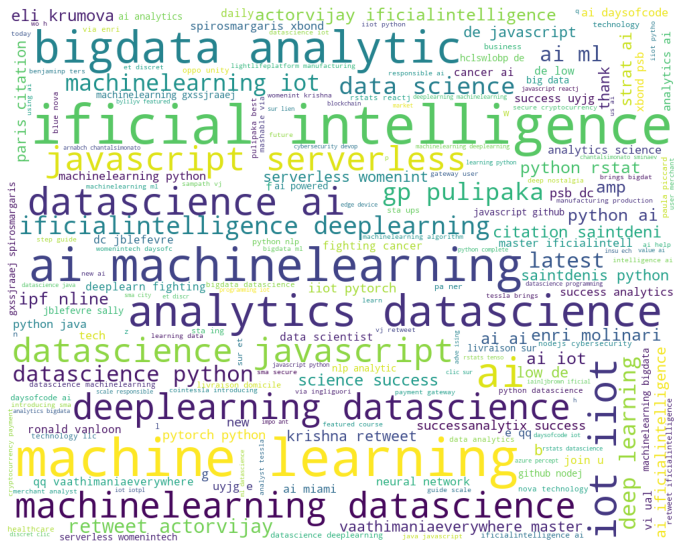

In [ ]:
class TweetObject():
    
    
    client = MongoClient("mongodb://localhost:27017")
    db = client['twitterdb']
    tweets = db['twitter_search']
    df = pd.DataFrame(list(tweets.find()))
    
    def clean_tweets(self,data):
    # text preprocessing
        stopword_list = stopwords.words('english')
        ps=PorterStemmer()
        wordnet_lemmatizer = WordNetLemmatizer()
        df["clean_tweets"] = None
        df['len'] = None
        for i in range(0,len(df['text'])):
            # get rid of anything that isnt a letter

            exclusion_list = ['[^a-zA-Z]','rt', 'http', 'co', 'RT']
            exclusions = '|'.join(exclusion_list)
            text = re.sub(exclusions, ' ' , df['text'][i])
            text = text.lower()
            words = text.split()
            words = [wordnet_lemmatizer.lemmatize(word) for word in words if not word in stopword_list]
             # only use stem of word
            #words = [ps.stem(word) for word in words]
            df['clean_tweets'][i] = ' '.join(words)


        # Create column with data length
        df['len'] = np.array([len(tweet) for tweet in df["clean_tweets"]])


        return df
    
    def sentiment(self,tweet):
        
        analysis = TextBlob(tweet)
    
        if analysis.sentiment.polarity >0:
            return 1
        elif analysis.sentiment.polarity == 0:
            return 0
        else:
            return -1

    
    def save_to_csv(self,df):
        try:
            df.to_csv('clean_tweets.csv')
            print('\n')
            print('csv is successfully is saved. \n')
            
        except Error as e:
            print(e)
    
    def word_cloud(self,df):
        plt.subplots(figsize = (12,10))
        wordcloud = WordCloud(background_color='white',width=1000,height=800).generate(" ".join(df['clean_tweets']))
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.show()

if __name__ == '__main__':
    t=TweetObject()
    data = t.df
    data = t.clean_tweets(data)
    data['Sentiment'] = np.array([t.sentiment(x) for x in data['clean_tweets']])
    t.word_cloud(data)
    t.save_to_csv(data)
    
    
    pos_tweets = [tweet for index, tweet in enumerate(data["clean_tweets"]) if data["Sentiment"][index] > 0]
    neg_tweets = [tweet for index, tweet in enumerate(data["clean_tweets"]) if data["Sentiment"][index] < 0]
    neu_tweets = [tweet for index, tweet in enumerate(data["clean_tweets"]) if data["Sentiment"][index] == 0]

	#Print results
    print("percentage of positive tweets: {}%".format(100*(len(pos_tweets)/len(data['clean_tweets']))))
    print("percentage of negative tweets: {}%".format(100*(len(neg_tweets)/len(data['clean_tweets']))))
    print("percentage of neutral tweets: {}%".format(100*(len(neu_tweets)/len(data['clean_tweets']))))
    
    